# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import pandas as pd
df=pd.read_csv('boston_data.csv')

In [2]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [8]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

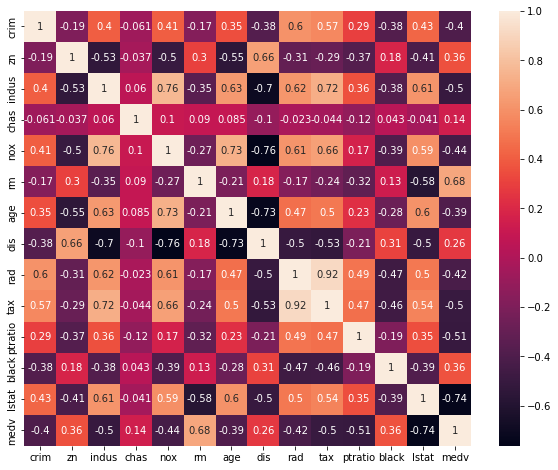

In [6]:
corr=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)

<AxesSubplot:xlabel='medv', ylabel='lstat'>

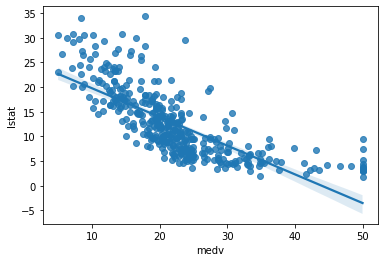

In [10]:
sns.regplot(data=df, x='medv', y='lstat')

<AxesSubplot:xlabel='medv', ylabel='rm'>

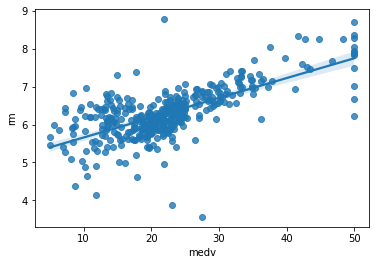

In [13]:
sns.regplot(data=df, x='medv', y='rm')

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Yes, from the correlation matrix we can see that rm is proportinal to medv and lstat is inversely proportional.
# rm is the average number of rooms per dwelling and lstat is % lower status of the population so it is expected.

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [ ]:
# rad and tax are highly correlated. rad is index of accessibility to radial highways and tax is 
# full-value property-tax rate per $10,000. 

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [14]:
df['medv'].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [15]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [17]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [24]:
x_cols=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']

In [25]:
X=df[x_cols]
y=df['medv']

In [26]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [36]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor
depth=[2, 4, 6, 8, 10]
l=[]
for i in depth:
    l.append(RandomForestRegressor(max_depth=i).fit(X_train, y_train))

In [40]:
scores_train=[]
scores_test=[]
for i in l:
    scores_train.append(i.score(X_train, y_train))
    scores_test.append(i.score(X_test, y_test))
print(scores_train)
print(scores_test)

[0.7806355578304364, 0.9105860480066807, 0.9551809399873116, 0.9675154629753248, 0.9708630178564265]
[0.7532290553753793, 0.8333226041038847, 0.8675461964189217, 0.8746983990069956, 0.8735038401806735]


Now, plot the score for each tree on the training set and on the testing set.

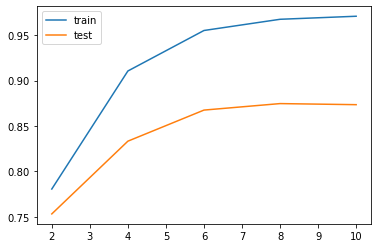

In [44]:
plt.plot(depth, scores_train, label = "train")
plt.plot(depth, scores_test, label = "test")
plt.legend()
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# It increases the accuracy up to a point. After that, increasing depth does not change the accuracy.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Depth of 1 would give low variance and high bias. Increasing the depth to 10 would increase the variance and reduce
# the bias.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# I would guess around 5, 6 would be optimal.

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
"""The model is not performing very well with the test data. There must have been a lot of change in the parameters 
used in this dataset since 1978 and there are a lot of other parameters that were not taken into account in this 
dataset.For a rural city, there could be other parameters more important for housing prices."""